In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown, Latex
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def analyse(df, string):

    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 25)
    str = "Accuracy, Precision, Recall, F1 Score for:  "+string
    
    display(Markdown('## '+str))
    # RandomForestClassifier
    model = RandomForestClassifier(random_state = 25)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_pred, y_test)*100, 2)
    prec = round(precision_score(y_pred, y_test)*100, 2)
    recall = round(recall_score(y_pred, y_test)*100, 2)
    f1 = round(f1_score(y_pred, y_test)*100, 2)
    
    display(Markdown("### Random Forest Classifier"))
    print("Accuracy:",acc)
    print("Precision:",prec)
    print("Recall:",recall)
    print("F1 Score:",f1)
    # Decision Tree

    model = DecisionTreeClassifier(random_state = 25)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    acc = round(accuracy_score(y_pred, y_test)*100, 2)
    prec = round(precision_score(y_pred, y_test)*100, 2)
    recall = round(recall_score(y_pred, y_test)*100, 2)
    f1 = round(f1_score(y_pred, y_test)*100, 2)

    display(Markdown("### Decision tree Classifier"))
    print("Accuracy:",acc)
    print("Precision:",prec)
    print("Recall:",recall)
    print("F1 Score:",f1,"\n")
    
    display(Markdown("### ROC Curve"))
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specificity')
    plt.ylabel('sensitivity')
    plt.show()
    
    
    cm = confusion_matrix(y_test, y_pred, labels = [1,0])
    
    display(Markdown("### Classification Report"))
    print(classification_report(y_test, y_pred))
    
    display(Markdown("### Confusion Matrix"))
    ax = sb.heatmap(cm, annot=True, fmt='g') 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()


In [3]:
# load dataset
df = pd.read_csv('data/dataset.csv')

# ip and target (numpy arrays)
df_ip = df['IP'].values
target = df['target'].values

# separate the 4 octets
arr = np.array(list(map(lambda x: x.split('.'), df_ip))).astype(np.int)

# convert numpy array `arr` to pandas DataFrame
new_df = pd.DataFrame(data = arr, columns = ['X1', 'X2', 'X3', 'X4'])


# ---- Feature Extraction ----

# Adding new features according to Octet Method
new_df['N2'] = 256 + new_df['X2']
new_df['N3'] = 512 + new_df['X3']
new_df['N4'] = 768 + new_df['X4']

# Additional features according to Ex-Octet Method
new_df['N5'] = 768 + (new_df['X1']+new_df['X2'])%256
new_df['N6'] = 1024 + (new_df['X1']+new_df['X2']+new_df['X3'])%256
new_df['N7'] = 1280 + (new_df['X1']+new_df['X2']+new_df['X3']+new_df['X4'])%256
new_df['target'] = df['target']


# final dataframe used for train/test

df0 = new_df[['X1']].values
df1 = new_df[['X1', 'N2']].values
df2 = new_df[['X1', 'N2', 'N3']].values
df3 = new_df[['X1', 'N2', 'N3', 'N4']].values
df4 = new_df[['X1', 'N2', 'N3', 'N4', 'N5']].values
df5 = new_df[['X1', 'N2', 'N3', 'N4', 'N5', 'N6']].values
df6 = new_df[['X1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7']].values

df7 = new_df[['X1', 'X2']].values
df8 = new_df[['X1', 'X2', 'X3']].values
df9 = new_df[['X1', 'X2', 'X3', 'X4']].values

df10 = new_df[['X1', 'X2', 'N2']].values
df11 = new_df[['X1', 'X2', 'N3']].values
df12 = new_df[['X1', 'X2', 'N4']].values
df13 = new_df[['X1', 'X2', 'N2', 'N3']].values
df14 = new_df[['X1', 'X2', 'N2', 'N3', 'N4']].values

df15 = new_df[['X1', 'X2', 'X3', 'N2', 'N3']].values

df27 = new_df[['X1', 'X2', 'N5']].values
df28 = new_df[['X1', 'X2', 'N6']].values
df29 = new_df[['X1', 'X2', 'N7']].values

df30 = new_df[['X1', 'X2', 'X3', 'N6']].values
df31 = new_df[['X1', 'X2', 'X3', 'X4', 'N7']].values

df32 = new_df[['X1', 'N2', 'N5']].values
df33 = new_df[['X1', 'N2', 'N6']].values
df34 = new_df[['X1', 'N2', 'N7']].values

df35 = new_df[['X1', 'N2', 'N3', 'N6']].values
df36 = new_df[['X1', 'N2', 'N3', 'N4', 'N7']].values



## Accuracy, Precision, Recall, F1 Score for:  X1, X2

### Random Forest Classifier

Accuracy: 91.37
Precision: 79.45
Recall: 85.67
F1 Score: 82.45


### Decision tree Classifier

Accuracy: 91.5
Precision: 79.65
Recall: 86.01
F1 Score: 82.71 



### ROC Curve

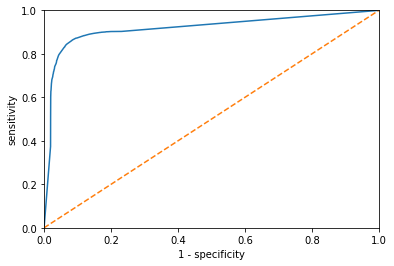

### Classification Report

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     17663
           1       0.86      0.80      0.83      6050

    accuracy                           0.92     23713
   macro avg       0.90      0.88      0.89     23713
weighted avg       0.91      0.92      0.91     23713



### Confusion Matrix

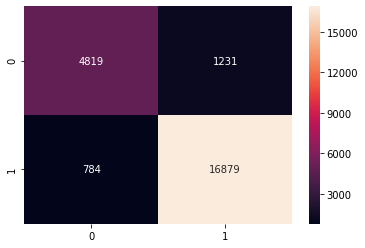

In [4]:
# We have tried many permutations and combinations and thereafter finalised the feature set which gave us the best results

# analyse(df0, 'X1')
# analyse(df1, 'X1, N2')
# analyse(df2, 'X1, N2, N3')
# analyse(df3, 'X1, N2, N3, N4')
# analyse(df4, 'X1, N2, N3, N4, N5')
# analyse(df5, 'X1, N2, N3, N4, N5, N6')
# analyse(df6, 'X1, N2, N3, N4, N5, N6, N7')

analyse(df7, 'X1, X2') # gives best results
# analyse(df8, 'X1, X2, X3')
# analyse(df9, 'X1, X2, X3, X4')

# analyse(df10, 'X1, X2, N2')
# analyse(df11, 'X1, X2, N3') 
# analyse(df12, 'X1, X2, N4')
# analyse(df13, 'X1, X2, N2, N3')
# analyse(df14, 'X1, X2, N2, N3, N4')

# analyse(df15, 'X1, X2, X3, N2, N3')

# analyse(df27, 'X1, X2, N5') # gives best results

# analyse(df28, 'X1, X2, N6')
# analyse(df29, 'X1, X2, N7')

# analyse(df30, 'X1, X2, X3, N6')
# analyse(df31, 'X1, X2, X3, X4, N7')

# analyse(df32, 'X1, N2, N5')
# analyse(df33, 'X1, N2, N6')
# analyse(df34, 'X1, N2, N7')

# analyse(df35, 'X1, N2, N3, N6')
# analyse(df36, 'X1, N2, N3, N4, N7')
